In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
df=pd.read_csv('supermarket_sales (prepared).csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Product line:_Electronic accessories,Product line:_Fashion accessories,Product line:_Food and beverages,Product line:_Health and beauty,Product line:_Home and lifestyle,Product line:_Sports and travel,Unit price,Quantity,Tax 5%,Total,Date,Time,Time Of Day,Payment,cogs,gross margin percentage,gross income,Old Rating,New Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,0,0,0,1,0,0,74.69,7,26.1415,548.9715,1/5/2019,13:08,Afternoon,Ewallet,522.83,4.761905,26.1415,9.1,Great
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,1,0,0,0,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,Morning,Cash,76.40,4.761905,3.8200,9.6,Great
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,0,0,0,0,1,0,46.33,7,16.2155,340.5255,3/3/2019,13:23,Afternoon,Credit card,324.31,4.761905,16.2155,7.4,Good
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,0,0,0,1,0,0,58.22,8,23.2880,489.0480,1/27/2019,20:33,Evening,Ewallet,465.76,4.761905,23.2880,8.4,Great
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,0,0,0,0,0,1,86.31,7,30.2085,634.3785,2/8/2019,10:37,Morning,Ewallet,604.17,4.761905,30.2085,5.3,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,0,0,0,1,0,0,40.35,1,2.0175,42.3675,1/29/2019,13:46,Afternoon,Ewallet,40.35,4.761905,2.0175,6.2,Good
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,0,0,0,0,1,0,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Afternoon,Ewallet,973.80,4.761905,48.6900,4.4,Average
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,0,0,1,0,0,0,31.84,1,1.5920,33.4320,2/9/2019,13:22,Afternoon,Cash,31.84,4.761905,1.5920,7.7,Good
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,0,0,0,0,1,0,65.82,1,3.2910,69.1110,2/22/2019,15:33,Afternoon,Cash,65.82,4.761905,3.2910,4.1,Average


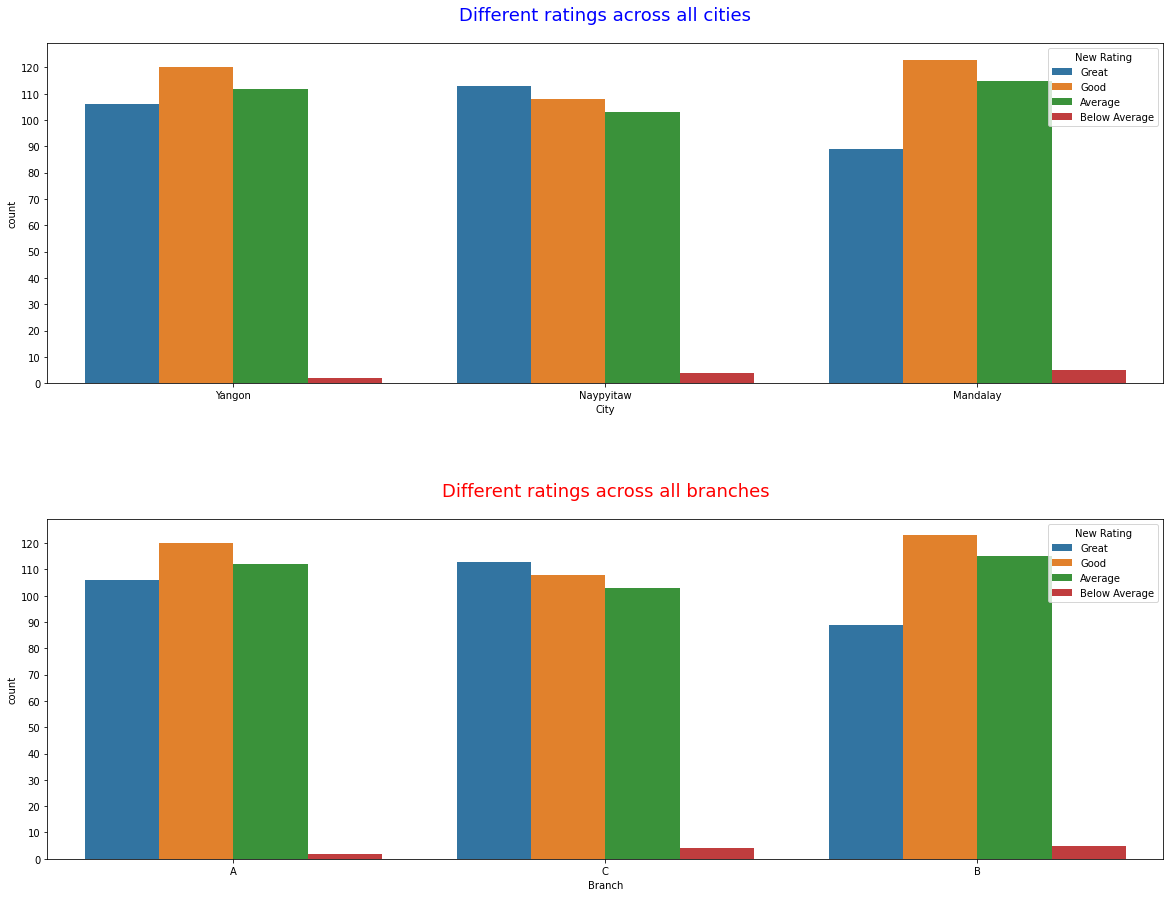

In [10]:
fig, axes = plt.subplots(2, 1,figsize=(20,15))
sns.countplot(x='City',data=df,hue='New Rating',ax=axes[0]).set_title('Different ratings across all cities',fontsize=18,y=1.05,color='b')
sns.countplot(x='Branch',data=df,hue='New Rating',ax=axes[1]).set_title('Different ratings across all branches',fontsize=18,y=1.05,color='r')
plt.subplots_adjust(hspace=0.4)
plt.setp(axes[0],yticks=(range(0,121,10)))
plt.setp(axes[1],yticks=(range(0,121,10)))

Text(0.5, 0, 'Average cogs')

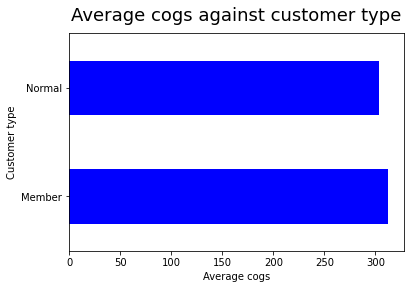

In [7]:
avg_gi=df.groupby('Customer type').mean()
d=avg_gi[['cogs']].rename(columns={'cogs':'Average cogs'})
d.plot.barh(color=['b'],legend=False).set_title('Average cogs against customer type',fontsize=18,y=1.03)
plt.xlabel('Average cogs')

Text(0.5, -0.2, 'Product line')

<Figure size 432x288 with 0 Axes>

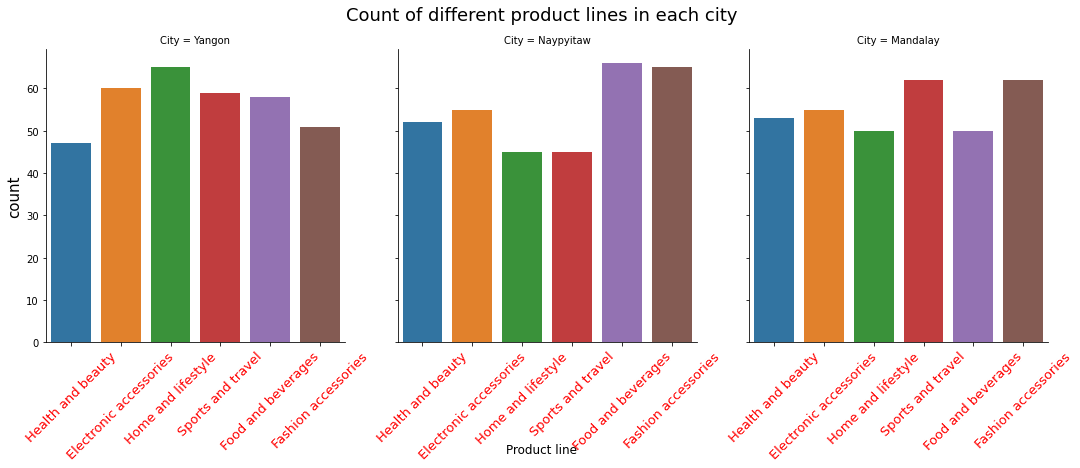

In [4]:
fig=plt.figure()
g=sns.catplot(x='Product line',col='City',data=df,kind='count',alpha=1)
g.set_xlabels('')
g.set_ylabels(fontsize=15)
g.set_xticklabels(rotation=45,color='r',size=13)
g.figure.suptitle('Count of different product lines in each city',y=1.05,fontsize=18)
g.figure.supxlabel('Product line',y=-0.2)

[Text(0.5, 0, 'Total gross income'),

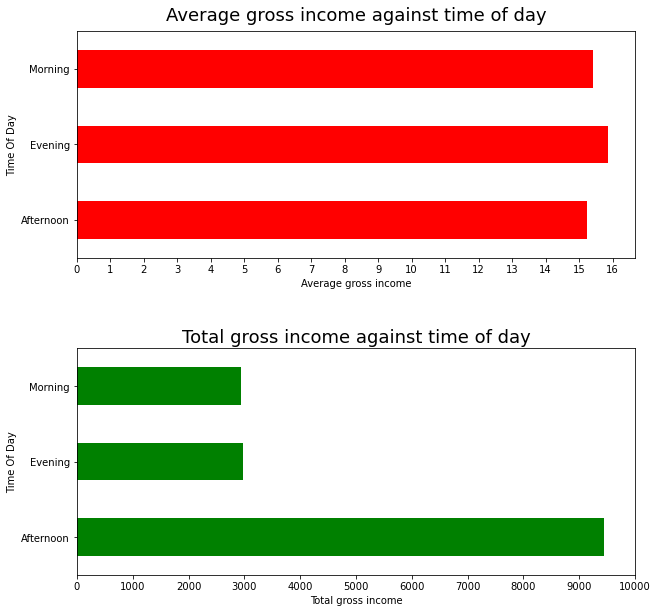

In [3]:
avgbytod=df.groupby('Time Of Day').mean()
totalbytod=df.groupby('Time Of Day').sum()
avg_gi=avgbytod[['gross income']].rename(columns={'gross income':'avg gross income'})
total_gi=totalbytod[['gross income']].rename(columns={'gross income':'total gross income'})

fig, axes = plt.subplots(2,1,figsize=(10,10))
avg_gi.plot.barh(ax=axes[0],color='r',legend=False).set_title('Average gross income against time of day',fontsize=18,y=1.02)
total_gi.plot.barh(ax=axes[1],color='g',legend=False).set_title('Total gross income against time of day',fontsize=18)
plt.subplots_adjust(hspace=0.4)
plt.setp(axes[0],xlabel='Average gross income',xticks=(range(0,17,1)))
plt.setp(axes[1],xlabel='Total gross income',xticks=(range(0,10001,1000)))